In [3]:
import numpy as np
from functions import convolve2d
K_downOnly = np.array([[-1],[1]])
K_withAntimatter = np.array([[-1],[0],[1]])/2
K_gradient = K_withAntimatter

M = np.concatenate([np.ones([20,10]), np.zeros([20,10])])
v = 0.1  ## V ∈ [-1, 1]  relativ to Vmax aka c
#V = v*np.ones_like(M)
#V = v*np.concatenate([np.ones([20,5]), np.zeros([20,5])], axis=1)

def step(M, V):
    Gradient = convolve2d(M*V, K_gradient, mode="same", boundary="wrap")
    return M + Gradient

## vertical translation with 10 different speeds (one column each)
V = np.concatenate([(1-2*column/10)*np.ones([40,1]) for column in range(10)], axis=1)
results = []
for _step in range(9):
    M=step(M, V)
    results.append(M)
with np.printoptions(linewidth=200, formatter={'float': lambda x: "{: .3f}".format(x)}):
    print(results[0], "\n", np.sum(M), "\n")

[[ 0.500  0.600  0.700  0.800  0.900  1.000  1.100  1.200  1.300  1.400]
 [ 1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000]
 [ 1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000]
 [ 1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000]
 [ 1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000]
 [ 1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000]
 [ 1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000]
 [ 1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000]
 [ 1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000]
 [ 1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000]
 [ 1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000]
 [ 1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000]
 [ 1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000]
 [ 1.000  1.000  1.000  1.000  1.000  1.000  1.000 

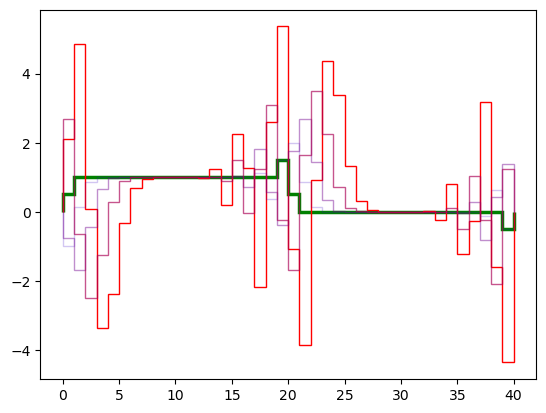

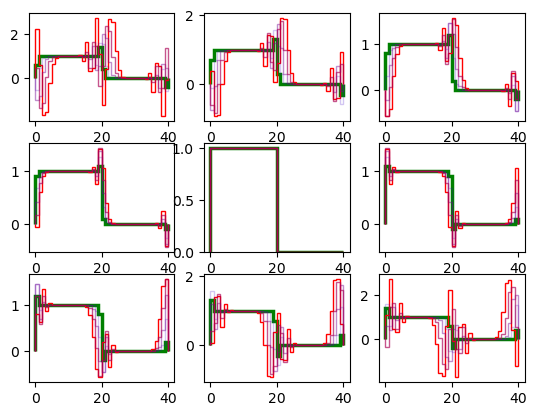

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot(ax, results, column):
    ax.stairs(results[0].T[column], color='green', linewidth=2.5)
    ax.stairs(results[-1].T[column], color='red')
    for s in range(2, len(results)-2, 2):
        s_rel = s/len(results)
        ax.stairs(results[s].T[column], color=[s_rel, 0, 1-s_rel], alpha=s_rel)

fig, ax = plt.subplots()
plot(ax, results, 0)
plt.show()

fig, axs = plt.subplots(3,3)
for column in range(1,10):
    ax = axs.flatten()[column-1]
    plot(ax, results, column)
plt.show()